In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

In [95]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/dataC.csv'
df = pd.read_csv(url)
df.head()
df.sort_values(by='x',inplace=True)

<AxesSubplot:xlabel='x', ylabel='y'>

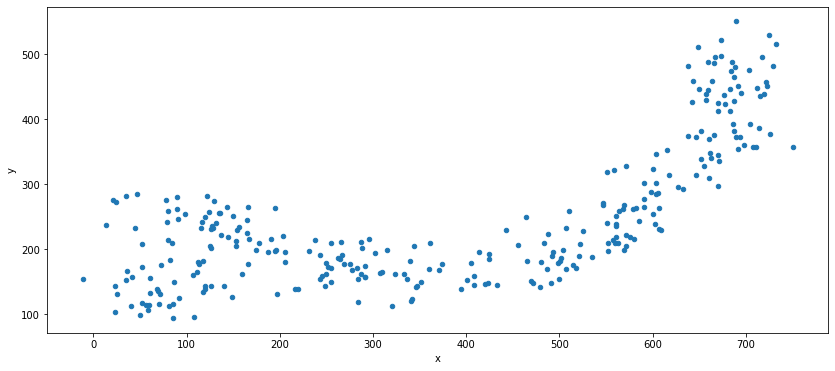

In [96]:
df.plot(kind='scatter', x='x',y='y',figsize=(14,6))

In [97]:
xtrain, xtest, ytrain, ytest = train_test_split(df[['x']].values, 
    df.y.values, test_size=.2, random_state=1)

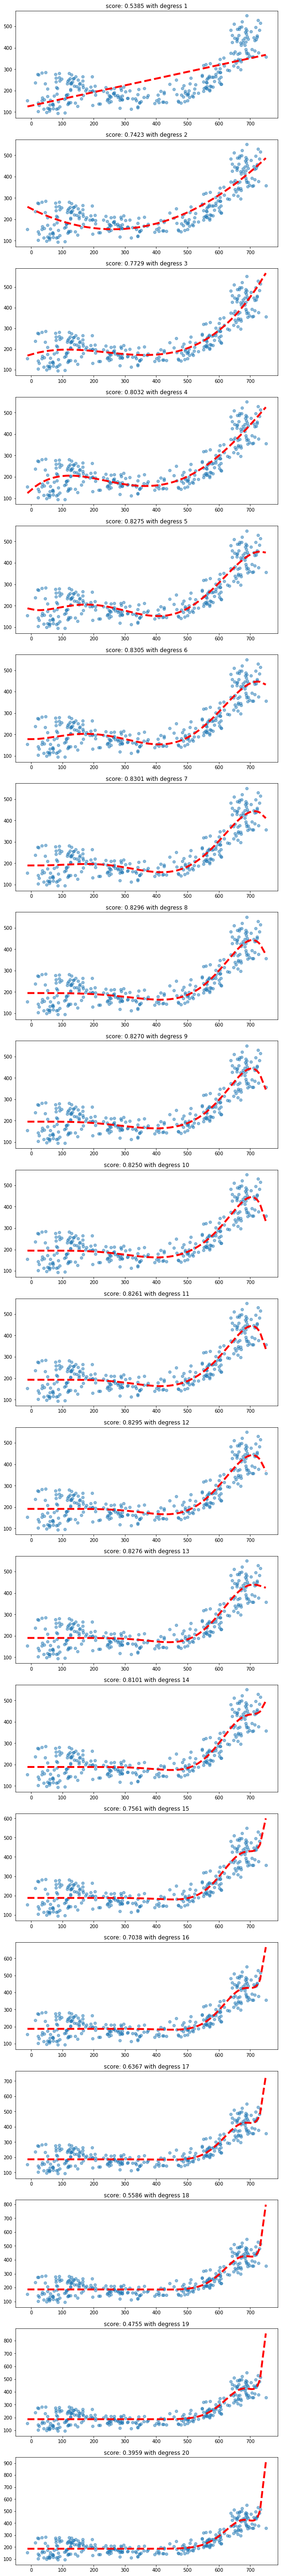

In [107]:
result = []
degree_limit = 20
fig,ax = plt.subplots(nrows=degree_limit, figsize=(10,degree_limit*5))
for degree in range(1,degree_limit+1):

    model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
    model.fit(xtrain, ytrain)
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    mae_train = mean_absolute_error(ytrain, ypred_train)
    mae_test = mean_absolute_error(ytest, ypred_test)
    score = r2_score(ytest, ypred_test)
    result.append({
        'sno':degree,
        'train_error': mae_train,
        'test_error' : mae_test,
        'score' : score,
    })
    row = degree-1
    ax[row].scatter(x=df['x'], y=df['y'],label='original',alpha=.5)
    ax[row].plot(df['x'], model.predict(df[['x']].values), 'r--', label=f'pf = {degree}', linewidth=4,)
    ax[row].set_title(f'score: {score:.4f} with degress {degree}')
plt.show()

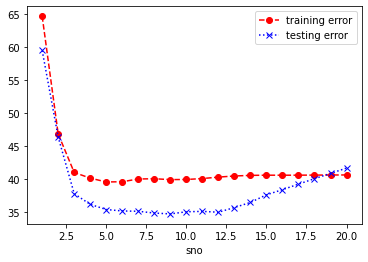

In [108]:
errordf = pd.DataFrame(result)
errordf.set_index('sno',inplace=True)
errordf['train_error'].plot(style='ro--', label='training error')
errordf['test_error'].plot(style='bx:', label = 'testing error')
plt.legend()
plt.show()